### imports

In [22]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from scipy.linalg import svd

In [2]:
data = load_iris()

In [3]:
x = data['data']
y = data['target']

In [4]:
x.shape, y.shape

((150, 4), (150,))

standardizing the data

In [11]:
x_std = (x - x.mean(axis=0) ) / x.std(axis=0)

build a covariance matrix

In [12]:
cov = x_std.T @ x_std / (len(x_std)-1)

In [18]:
cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

extract the eigenvectors and eigenvalues

In [13]:
eig_values, eig_vectors = np.linalg.eig(cov)

In [14]:
eig_values, eig_vectors

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

x_new is the same data as x but projected on the new basis vectors (eigenvectors). in x_new, the first column will be the most informative/valuable column and last column will be the least informative/valuable

In [15]:
x_new = x @ eig_vectors[:,:4]

In [17]:
def build_and_predict(x,y):
    model = Ridge()
    model.fit(x[:70],y[:70])
    print(abs(model.predict(x[70:])-y[70:]).mean())
    print('-----------------')

In [29]:
print('prediction error based on original data')
build_and_predict(x,y)

print('prediction error based on new projection')
build_and_predict(x_new,y)

print('prediction error based on first 2 columns of original data')
build_and_predict(x[:,0:2],y)

print('prediction error based on first 2 columns of new projection')
build_and_predict(x_new[:,0:2],y)


# build_and_predict(x_new[:,0:1],y)
# print('---------------------------------------')

# build_and_predict(x_new[:,3:4],y)
# print('---------------------------------------')


prediction error based on original data
0.4198165926259623
-----------------
prediction error based on new projection
0.4198165926259623
-----------------
prediction error based on first 2 columns of original data
0.6885606983348657
-----------------
prediction error based on first 2 columns of new projection
0.45027139058328897
-----------------


using all 4 columns yeilds the same error whether pca or not. when reducing the pca version to just 2 columns it manages to keep the error close enough to the 4 column version. 
- error all 4 columns: 0.42
- error for 2 columns: 0.45

### plotting the first 2 columns of the pca adjusted data

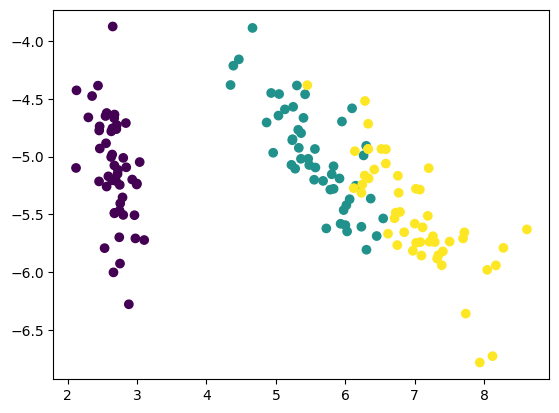

In [34]:
plt.scatter(x_new[:,0],x_new[:,1], c=y)
plt.show()

### testing out pca on a grayscale image

In [35]:
img = plt.imread('img.jpg')
x = img[:,:,0]

In [15]:
# model = PCA(n_components=i)
# model.fit(x)

(5977, 4125)

In [36]:
x_std = (x - x.mean(axis=0) ) / x.std(axis=0)
cov = x_std.T @ x_std / (len(x_std)-1)
eig_values, eig_vectors = np.linalg.eig(cov)

In [37]:
eig_values = eig_values / eig_values.sum()

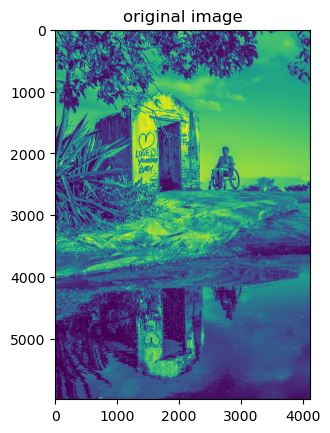

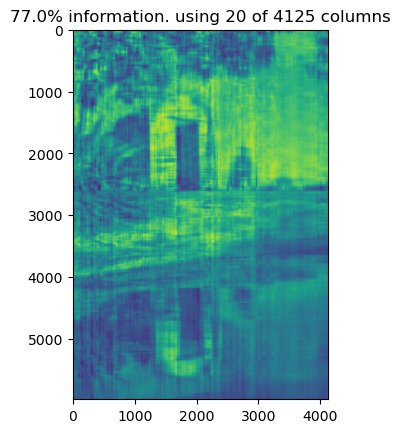

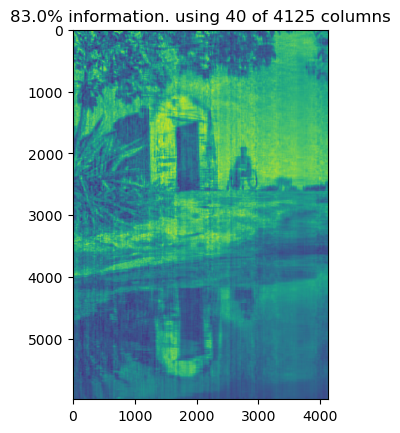

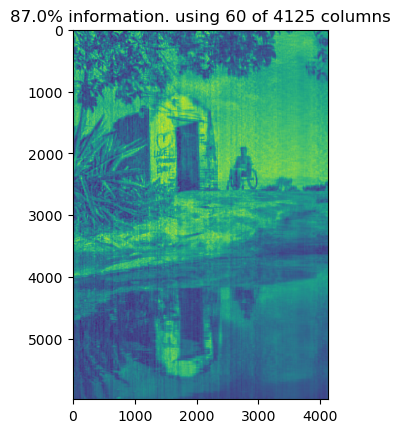

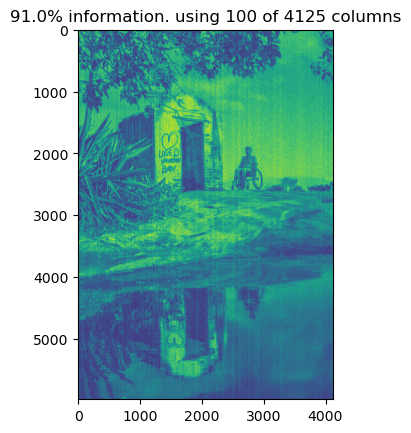

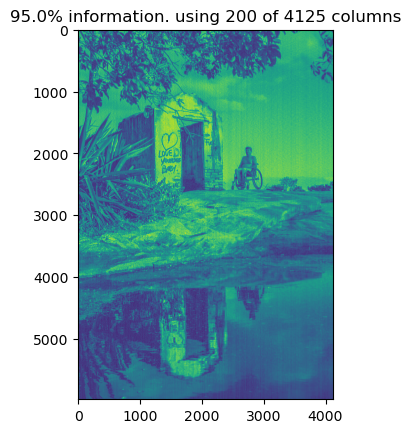

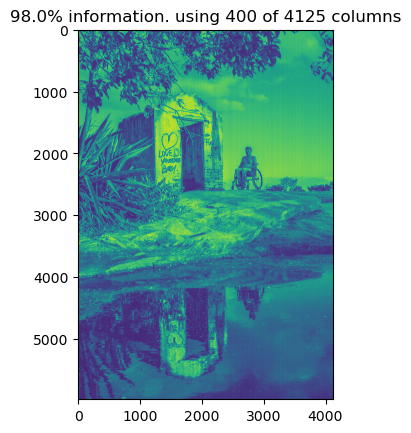

In [38]:
plt.imshow(x)
plt.title(
        'original image'
    )
plt.show()

for i in [20,40,60,100,200,400]:
    x_new = (x @ eig_vectors[:,:i]) @ eig_vectors[:,:i].T
    plt.imshow(x_new)
    plt.title(
        f'{np.round(eig_values[:i].sum()*100)}% information. using {i} of {x.shape[1]} columns'
    )
    plt.show()


### testing out svd on the same image

In [39]:
U, singular, V_transpose = svd(x)

In [40]:
U.shape, singular.shape, V_transpose.shape

((5977, 5977), (4125,), (4125, 4125))

In [41]:
info = singular / singular.sum()

In [42]:
# how to construct a lower res image with part of this data:
# 5977x20 x 20x20 x 20x4125

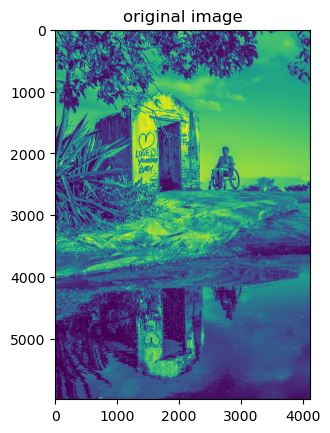

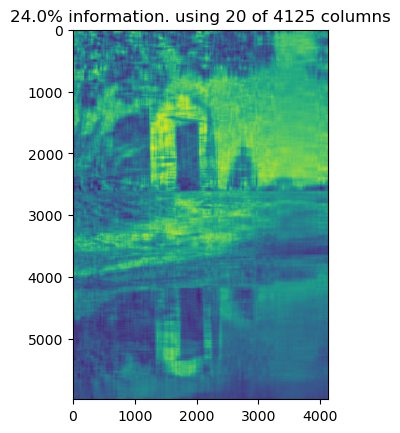

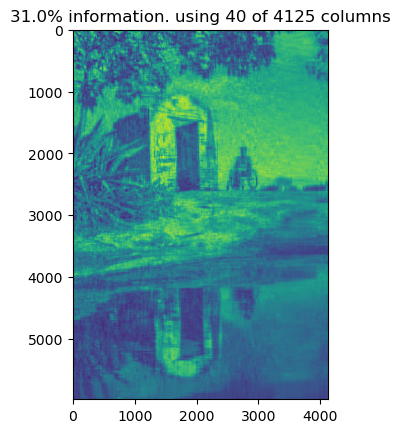

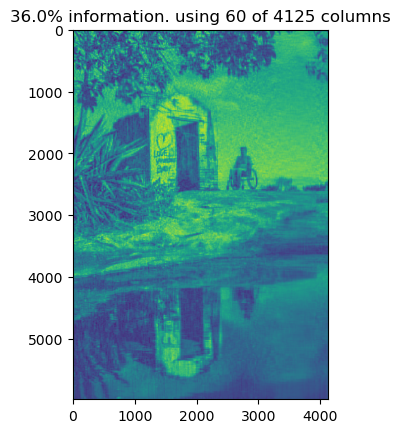

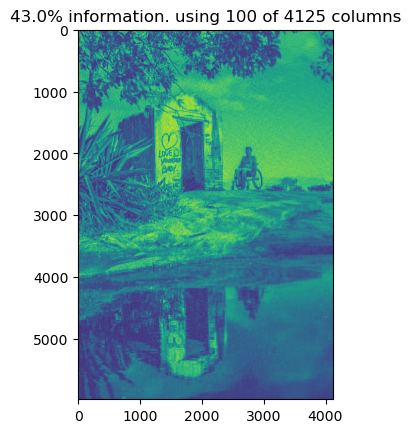

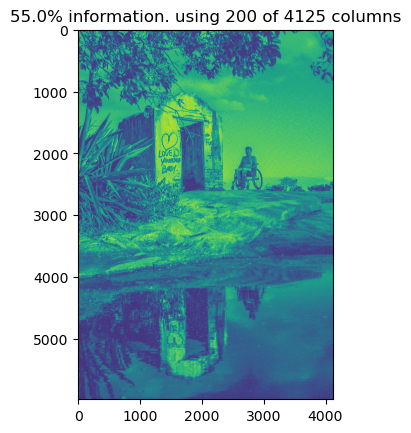

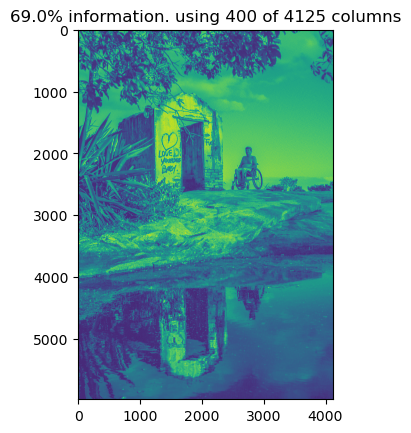

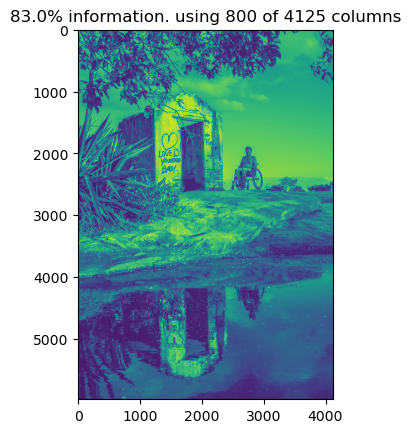

In [43]:
plt.imshow(x)
plt.title(
        'original image'
    )
plt.show()

for i in [20,40,60,100,200,400,800]:
    x_new = U[:,:i] @ np.diag(singular[:i]) @ V_transpose[:i,:]
    plt.imshow(x_new)
    plt.title(
        f'{np.round(info[:i].sum()*100)}% information. using {i} of {x.shape[1]} columns'
    )
    plt.show()


### interesting finding
setting all the singular values to the mean of singular values has an interesting effect. the image focuses more on the edges.

In [44]:
singular_test = np.ones(len(singular)) * singular.mean()

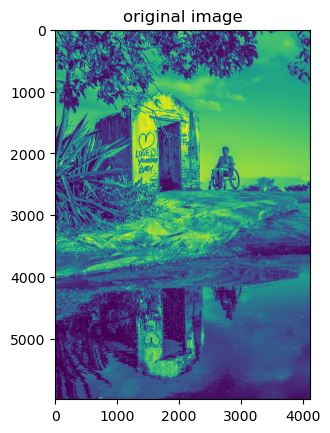

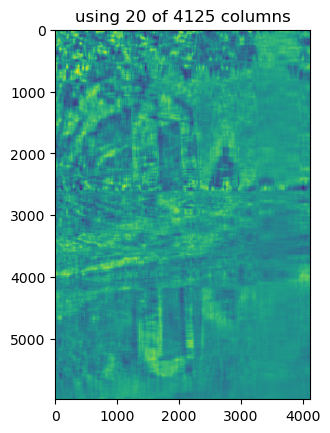

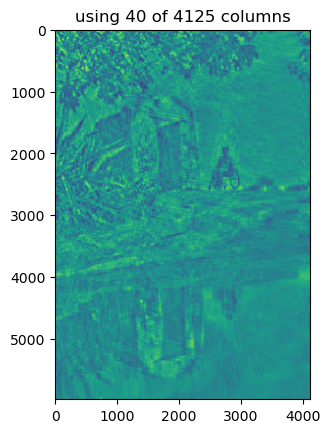

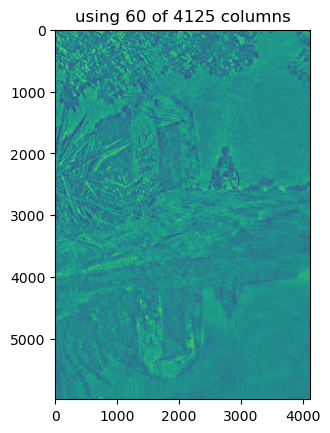

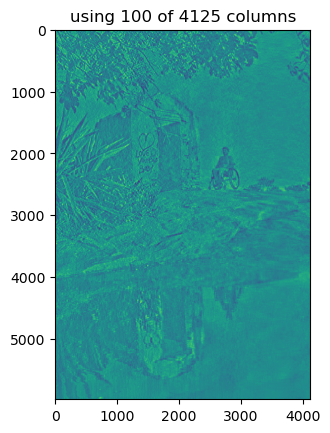

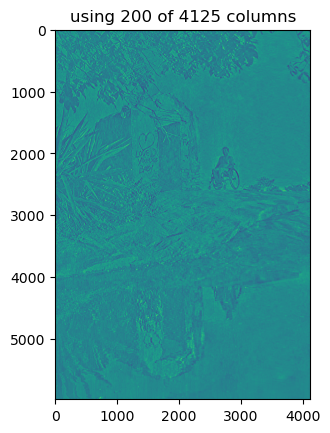

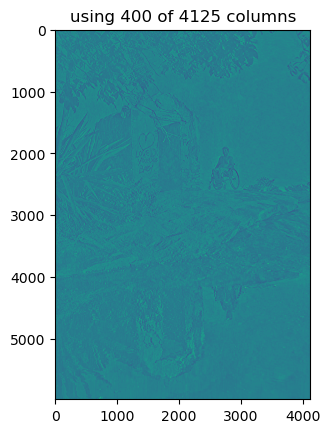

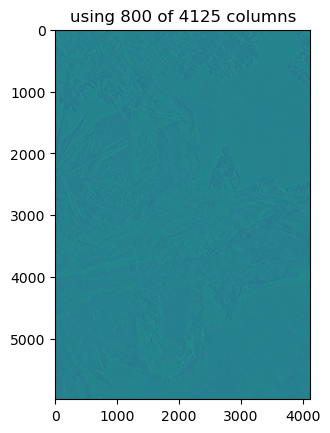

In [45]:
plt.imshow(x)
plt.title(
        'original image'
    )
plt.show()

for i in [20,40,60,100,200,400,800]:
    x_new = U[:,:i] @ np.diag(singular_test[:i]) @ V_transpose[:i,:]
    plt.imshow(x_new)
    plt.title(
        f'using {i} of {x.shape[1]} columns'
    )
    plt.show()
